<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [109]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [111]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [112]:
## Write your code here
df.describe().round(2)

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.00,3.374000e+04,29658.00,29324.00,29393.00,29411.00,29450.00,29448.00,29456.00,29456.00,29450.00,29445.00,23435.00,29126.00
mean,32719.00,2.963841e+145,11.47,18.58,7.52,10.06,24.34,22.97,20.28,16.17,10.96,9.95,86155.29,6.94
std,18890.18,5.444117e+147,9.17,25.97,18.42,21.83,27.09,27.02,26.11,24.85,22.91,21.78,186756.97,2.09
min,1.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,16360.00,6.000000e+04,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,32712.00,6.00
50%,32719.00,1.100000e+05,9.00,10.00,0.00,0.00,20.00,15.00,10.00,5.00,0.00,0.00,65000.00,7.00
75%,49078.00,2.500000e+05,16.00,22.00,5.00,10.00,30.00,30.00,25.00,20.00,10.00,10.00,107971.50,8.00
max,65437.00,1.000000e+150,50.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,16256603.00,10.00


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [113]:
## Write your code here
nulls = df.isnull().sum().sort_values(ascending=False)
nulls

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
MainBranch                        0
Age                               0
Employment                        0
Check                             0
ResponseId                        0
Length: 114, dtype: int64

In [114]:
print(type(nulls))

<class 'pandas.core.series.Series'>


In [115]:
null_df = pd.DataFrame(nulls).reset_index()


In [116]:
null_df = null_df.rename(columns={'index':'Variable', 0:'Values'})

In [117]:
null_df['Values'] = null_df['Values'].astype(float)

In [118]:
null_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variable  114 non-null    object 
 1   Values    114 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



In [119]:
null_df_indexed = pd.DataFrame(nulls)

In [120]:
null_df_indexed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, AINextMuch less integrated to ResponseId
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       114 non-null    int64
dtypes: int64(1)
memory usage: 5.9+ KB


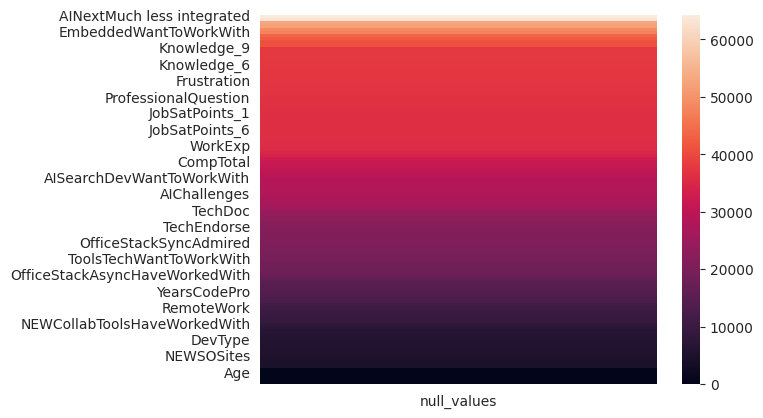

In [121]:
## Write your code 
sns.heatmap(null_df_indexed, xticklabels=['null_values'])
plt.show()

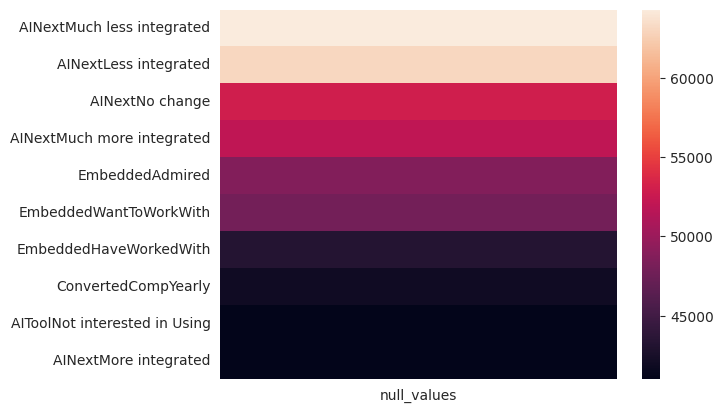

In [122]:
## Write your code 
sns.heatmap(null_df_indexed[:10], xticklabels=['null_values'])
plt.show()


##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [123]:
## Write your code here

df['Employment'].isnull().sum()

np.int64(0)

In [124]:
df['EmbeddedAdmired'].isnull().sum()

np.int64(48704)

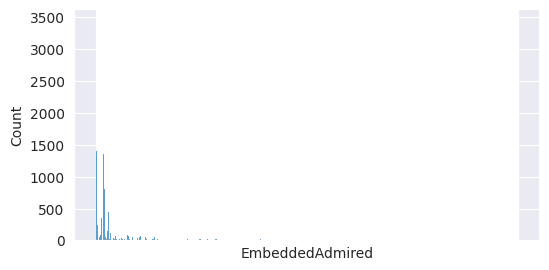

In [125]:
# sns.set_style("darkgrid")
fig = plt.figure(figsize=(6, 3))
sns.histplot(df['EmbeddedAdmired'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
# plt.grid()
plt.show()

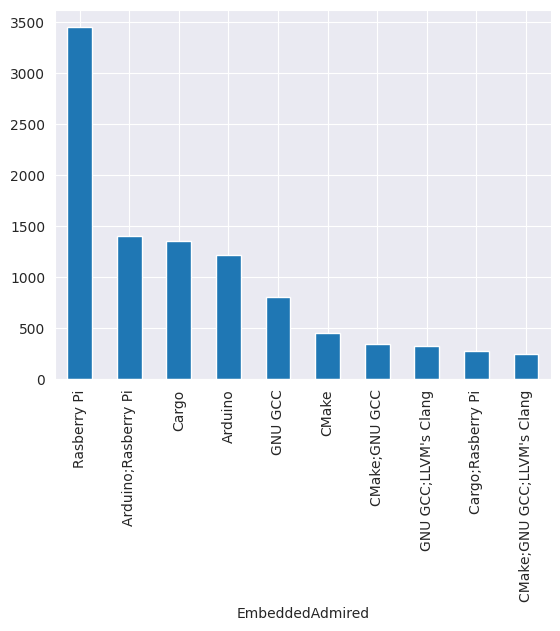

In [126]:
ea_vc_1 = df['EmbeddedAdmired'].value_counts().sort_values(ascending=False)[:10]

ea_vc_1.plot.bar()
plt.show()

### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [127]:
## Write your code here

mode_ea = df['EmbeddedAdmired'].mode()[0]
mode_ea 

'Rasberry Pi'

##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [128]:
## Write your code here
df['EmbeddedAdmired'] = df['EmbeddedAdmired'].fillna(value=mode_ea)

In [129]:
df['EmbeddedAdmired'].isnull().sum()

np.int64(0)

### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


<Axes: xlabel='EmbeddedAdmired'>

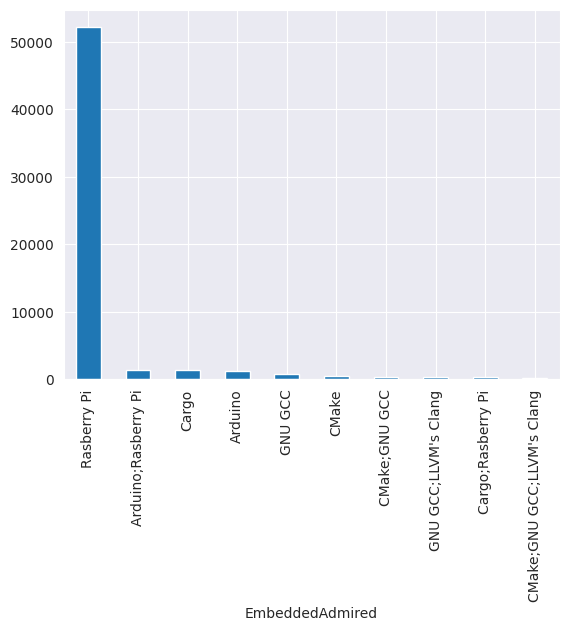

In [130]:
ea_vc_2 = df['EmbeddedAdmired'].value_counts().sort_values(ascending=False)[:10]

ea_vc_2.plot.bar()

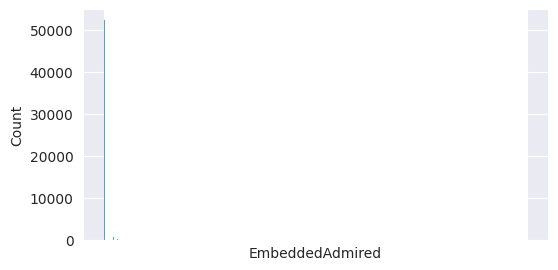

In [131]:
## Write your code here

# sns.set_style("darkgrid")
fig = plt.figure(figsize=(6, 3))
sns.histplot(df['EmbeddedAdmired'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
# plt.grid()
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
